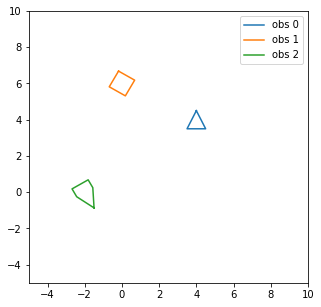

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
class Box2D:
    def __init__(self, x, y, yaw, corner_points=None, v=0.0):
        self.x = x
        self.y = y
        self.yaw = yaw
        self.corner_points = corner_points
        self.v = v

corner_points3 = [[0.5, -0.5, -0.5, 0.5],
                 [0.0, 0.5, -0.5, 0.0]]    
corner_points4 = [[0.5, -0.5, -0.5, 0.5, 0.5],
                 [0.5, 0.5, -0.5, -0.5, 0.5]]        
corner_points5 = [[1.0, 0.0, -0.5, -0.5, 0.0, 1.0],
                 [0.0, 0.5, 0.5, -0.5, -0.5, 0.0]]           
obs0 = Box2D(4.0, 4.0, math.pi/2.0, corner_points=corner_points3)
obs1 = Box2D(0.0, 6.0, math.pi/3.0, corner_points=corner_points4)
obs2 = Box2D(-2.0, 0.0, -math.pi/3.0, corner_points=corner_points5)
obs_buf = [obs0, obs1, obs2]
def local2global(x0, y0, yaw0, corner_points):
    R = np.array([[math.cos(yaw0), -math.sin(yaw0)],
                  [math.sin(yaw0), math.cos(yaw0)]])
    corner_arr = np.array(corner_points)
    return np.dot(R, corner_arr)+np.array([[x0],[y0]])
for i, obs in enumerate(obs_buf):
    gcp = local2global(obs.x, obs.y, obs.yaw, obs.corner_points)
    plt.plot(gcp[0], gcp[1], label="obs "+str(i))
    plt.axis([-5, 10, -5, 10])
plt.legend(loc="upper right")

plt.show()

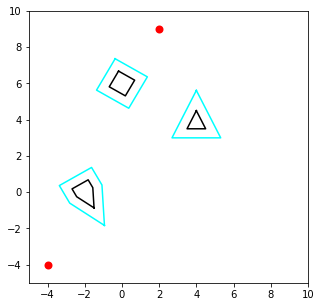

In [44]:
import math
import matplotlib.pyplot as plt
import numpy as np

def inflation_obs(obs, r):
    A = []
    inflat_cps = []
    gcp = local2global(obs.x, obs.y, obs.yaw, obs.corner_points)
    for i in range(len(gcp[0])-1):
        v1 = [gcp[0, i], gcp[1, i]]
        v2 = [gcp[0, i+1], gcp[1, i+1]]
        a = v2[0]-v1[0]
        b = v1[1]-v2[1]
        c = v1[1]*a+v1[0]*b
        inflat_c = -r*math.sqrt(a*a+b*b)+c
        A.append([a, b, inflat_c])
    pre_ind = -1
    for i in range(len(A)):
        a1, b1, c1 = A[pre_ind][1], A[pre_ind][0], A[pre_ind][2]
        a2, b2, c2 = A[i][1], A[i][0], A[i][2]
        x = (b2*c1-b1*c2)/(a1*b2-a2*b1)
        y = (a1*c2-a2*c1)/(a1*b2-a2*b1)  
        inflat_cps.append([x, y])
        pre_ind = i
    inflat_cps.append(inflat_cps[0])    
    return A, inflat_cps


plt.figure(figsize=(5, 5))

inflat_cps_buf = []
A_buf = []
for obs in obs_buf:
    gcp = local2global(obs.x, obs.y, obs.yaw, obs.corner_points)
    plt.plot(gcp[0], gcp[1], 'k')
    A, inflat_cps = inflation_obs(obs, 0.5)
    inflat_cps_buf.append(inflat_cps)
    A_buf.append(A)
    plt.plot(np.array(inflat_cps)[:,0],np.array(inflat_cps)[:,1], 'cyan')
plt.scatter(-4.0, -4.0, color='red', linewidth=2)
plt.scatter(2.0, 9.0, color='red', linewidth=2)       
plt.axis([-5, 10, -5, 10])
plt.show()   

Bx1_arr = []
By1_arr = []
Bx2_arr = []
By2_arr = []
for i in range(len(inflat_cps_buf)):
    inflat_cps = inflat_cps_buf[i]
    for j in range(len(inflat_cps)-1):
        Bx1_arr.append(inflat_cps[j][0])
        By1_arr.append(inflat_cps[j][1])
        Bx2_arr.append(inflat_cps[j+1][0])
        By2_arr.append(inflat_cps[j+1][1])
Bx1_arr = np.array(Bx1_arr)
By1_arr = np.array(By1_arr)
Bx2_arr = np.array(Bx2_arr)
By2_arr = np.array(By2_arr)

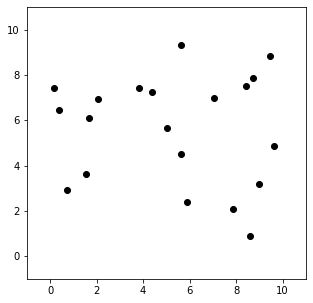

In [5]:
plt.figure(figsize=(5, 5))
for i in range(20):
    x = np.random.uniform([0, 0], [10, 10])
    plt.scatter(x[0], x[1], color='k')
plt.axis([-1, 11, -1, 11])
plt.show()


In [38]:

# time cost is 0.05774664878845215
def line_segment_cross_judge(Ax1, Ay1, Ax2, Ay2, Bx1, By1, Bx2, By2):
    if ((max(Ax1,Ax2)<=min(Bx1,Bx2) or min(Ax1,Ax2)>=max(Bx1,Bx2)) or
        (max(Ay1,Ay2)<=min(By1,By2) or min(Ay1,Ay2)>=max(By1,By2))):
        return False
    if (((Bx1-Ax1)*(Ay2-Ay1)-(By1-Ay1)*(Ax2-Ax1))*((Bx2-Ax1)*(Ay2-Ay1)-(By2-Ay1)*(Ax2-Ax1))<0 and
        ((Ax1-Bx1)*(By2-By1)-(Ay1-By1)*(Bx2-Bx1))*((Ax2-Bx1)*(By2-By1)-(Ay2-By1)*(Bx2-Bx1))<0):
        return True
    return False

def point_in_obs_judge(p, A):
    A_mat = np.array(A)
    x = np.array([p[1], p[0], -1]).T
    M = np.dot(A_mat, x)
    if np.min(M) > 0:
        return True
    return False

p = [-0.2513751 ,  7.14839532]
print(point_in_obs_judge(p, A_buf[1]))


True


In [53]:
import networkx as nx
G = nx.Graph()
node_buf = []
N = 20
rho = 8.0

start_pos = [-4.0, -4.0]
goal_pos = [2.0, 9.0]
node_buf.append(start_pos)
node_buf.append(goal_pos)

while len(node_buf) < N:
    p = np.random.uniform([-8, -8], [10, 10])
    is_point_in_obs = False
    # step 1 ： 判断点是否在障碍物内
    for A in A_buf:
        if point_in_obs_judge(p, A) == True:
            is_point_in_obs = True
            break
    if is_point_in_obs: continue
    node_buf.append(p)
    Ax1, Ay1 = p[0], p[1]       
    for j in range(len(node_buf)-1):
        dx = node_buf[j][0] - p[0]
        dy = node_buf[j][1] - p[1]
        if math.sqrt(dx*dx+dy*dy) < rho:
            Ax2, Ay2 = node_buf[j][0], node_buf[j][1]
            is_drivable = True
            for k in range(len(Bx1_arr)):
                if line_segment_cross_judge(Ax1, Ay1, Ax2, Ay2, Bx1_arr[k], By1_arr[k], Bx2_arr[k], By2_arr[k]):   
                    is_drivable = False
                    break
            if is_drivable:
                G.add_edge(len(node_buf)-1, j, weight=math.sqrt((Ax2-Ax1)**2+(Ay2-Ay1)**2))
    

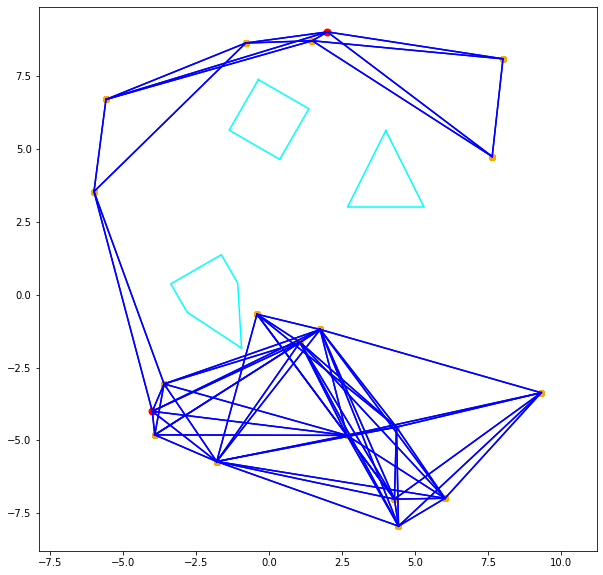

In [54]:
plt.figure(figsize=(10, 10))
for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        plt.scatter(node_buf[n][0], node_buf[n][1], color='orange')
        plt.scatter(node_buf[nbr][0], node_buf[nbr][1], color='orange')
        plt.plot([node_buf[n][0], node_buf[nbr][0]], [node_buf[n][1], node_buf[nbr][1]], 'b')
             
for inflat_cps in inflat_cps_buf:
    plt.plot(np.array(inflat_cps)[:,0],np.array(inflat_cps)[:,1], 'cyan')
plt.scatter(-4.0, -4.0, color='red', linewidth=2)
plt.scatter(2.0, 9.0, color='red', linewidth=2)    
plt.axis("equal")
plt.show()

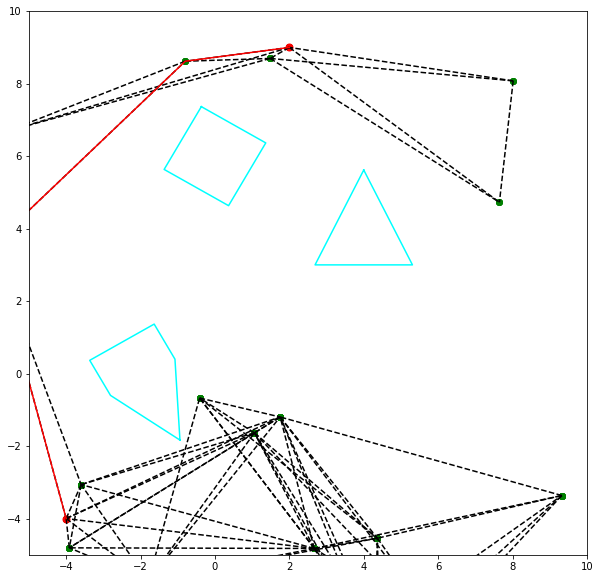

In [55]:
plt.figure(figsize=(10, 10)) 
path = nx.shortest_path(G, 0, 1, weight="weight")
for e in list(G.edges):
    node0 = node_buf[e[0]]
    node1 = node_buf[e[1]]
    plt.plot([node0[0], node1[0]], [node0[1], node1[1]], '--k')
    plt.scatter([node0[0], node1[0]], [node0[1], node1[1]], color='green')
for inflat_cps in inflat_cps_buf:
    plt.plot(np.array(inflat_cps)[:,0],np.array(inflat_cps)[:,1], 'cyan')
plt.plot(np.array(node_buf)[path][:,0], np.array(node_buf)[path][:,1], 'r')
plt.scatter(-4.0, -4.0, color='red', linewidth=2)
plt.scatter(2.0, 9.0, color='red', linewidth=2)
plt.axis([-5, 10, -5, 10])
plt.show() 